In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
# sns.set(rc={'figure.facecolor':'grey'})
from fitter import Fitter

In [68]:
!ls ./data

377_noNANs.csv		 full_data_with_nans.csv
378_noNANs_for_sure.csv  joined_data.csv


In [69]:
# df = pd.read_csv("./data/377_noNANs.csv")
df = pd.read_csv("./data/full_data_with_nans.csv")
df.shape

(5874, 376)

In [70]:
df.describe()

,ID,RID,SITEID,PTSOURCE,PTGENDER,PTDOBMM,PTDOBYY,PTHAND,PTMARRY,PTEDUCAT,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,Y
count,5874.000000,5874.000000,5874.000000,5874.000000,5734.000000,5734.000000,5734.000000,5731.000000,5874.000000,5734.000000,...,5860.000000,5860.000000,5860.000000,5858.000000,5858.000000,5858.000000,5860.000000,5860.000000,5.860000e+03,5610.000000
mean,8080.300477,4247.738849,30.304222,1.010215,1.475061,6.569062,1940.073596,1.101378,1.455907,16.283746,...,206393.177251,207389.489719,413782.669871,225204.672004,226216.742025,451421.403103,150306.138567,579162.530963,9.825203e+05,1.789305
std,19253.928694,1430.669436,17.459853,0.100558,0.499421,3.435284,7.818218,0.301856,0.865468,2.606843,...,22337.666298,22473.358106,44463.471382,29844.026368,30067.815724,59691.581329,42997.050312,55719.910500,1.058351e+05,0.633773
min,12.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1916.000000,1.000000,1.000000,6.000000,...,109831.777000,89603.654730,199435.431700,106254.861600,25546.000000,195210.941700,23596.000000,276362.431700,4.467504e+05,1.000000
25%,670.500000,4054.000000,16.000000,1.000000,1.000000,4.000000,1935.000000,1.000000,1.000000,14.000000,...,191557.250000,192754.394450,384298.250000,204640.500000,205670.250000,410508.750000,149513.500000,542326.000000,9.075862e+05,1.000000
50%,1480.000000,4445.000000,31.000000,1.000000,1.000000,7.000000,1940.000000,1.000000,1.000000,16.000000,...,206448.000000,207298.000000,413654.500000,224051.500000,225168.500000,449745.847800,162937.000000,579724.000000,9.800620e+05,2.000000
75%,2586.000000,4941.000000,46.000000,1.000000,2.000000,10.000000,1946.000000,1.000000,2.000000,18.000000,...,221155.379750,222408.000000,443140.000000,243459.500000,244932.000000,488040.500000,175328.000000,615375.000000,1.052612e+06,2.000000
max,118752.000000,6881.000000,63.000000,2.000000,2.000000,12.000000,1964.000000,2.000000,5.000000,20.000000,...,289315.996000,290674.859200,579990.855200,350784.000000,350209.000000,700367.000000,223265.000000,773898.000000,1.394760e+06,3.000000


In [71]:
df.dtypes

Phase              object
ID                  int64
RID                 int64
SITEID              int64
VISCODE_x          object
VISCODE2_x         object
USERDATE           object
USERDATE2          object
PTSOURCE            int64
PTGENDER          float64
PTDOBMM           float64
PTDOBYY           float64
PTHAND            float64
PTMARRY           float64
PTEDUCAT          float64
PTWORKHS          float64
PTWORK             object
PTWRECNT           object
PTNOTRT           float64
PTRTYR             object
PTHOME            float64
PTOTHOME           object
PTTLANG           float64
PTPLANG           float64
PTPSPEC            object
PTCOGBEG          float64
PTMCIBEG          float64
PTADBEG           float64
PTADDX            float64
PTETHCAT          float64
                   ...   
ST94TS            float64
ST95CV            float64
ST95SA            float64
ST95TA            float64
ST95TS            float64
ST96SV            float64
ST97CV            float64
ST97SA      

In [72]:
df.dtypes.value_counts()

float64    344
object      27
int64        5
dtype: int64

## Object variables

In [73]:
object_cols = list(df.columns[np.where(df.dtypes == 'object')[0]])
print(len(object_cols))
object_cols

27


['Phase',
 'VISCODE_x',
 'VISCODE2_x',
 'USERDATE',
 'USERDATE2',
 'PTWORK',
 'PTWRECNT',
 'PTRTYR',
 'PTOTHOME',
 'PTPSPEC',
 'update_stamp_x',
 'VISCODE_y',
 'VISCODE2_y',
 'EXAMDATE',
 'VERSION',
 'RUNDATE',
 'STATUS',
 'OVERALLQC',
 'TEMPQC',
 'FRONTQC',
 'PARQC',
 'INSULAQC',
 'OCCQC',
 'BGQC',
 'CWMQC',
 'VENTQC',
 'update_stamp_y']

**Looks like that variables with object type are some categorical and discrete values which encode some aux information about experiment and about patient.**

### Patient age distribution

**Age is patient specific record and this feature will be used to perform conditioning in latent space. Let's check that it is gaussian like:**

Text(0.5,0,'Age')

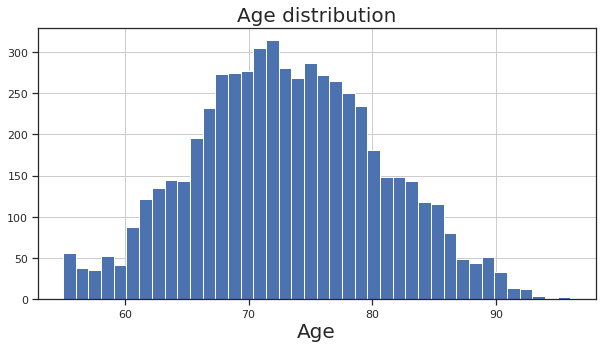

In [101]:
# age of patient is calculated as difference between date of birth and date of the experiment
(pd.to_datetime(df.EXAMDATE).dt.year - df.PTDOBYY).hist(density=False,bins=40,figsize=[10,5])
plt.title('Age distribution', fontsize=20)
plt.xlabel('Age',fontsize=20)

## Float variables

In [85]:
float_cols = list(df.columns[np.where(df.dtypes == 'float')[0]])
print(len(float_cols))
float_cols

344


['PTGENDER',
 'PTDOBMM',
 'PTDOBYY',
 'PTHAND',
 'PTMARRY',
 'PTEDUCAT',
 'PTWORKHS',
 'PTNOTRT',
 'PTHOME',
 'PTTLANG',
 'PTPLANG',
 'PTCOGBEG',
 'PTMCIBEG',
 'PTADBEG',
 'PTADDX',
 'PTETHCAT',
 'PTRACCAT',
 'LONIUID',
 'ST101SV',
 'ST102CV',
 'ST102SA',
 'ST102TA',
 'ST102TS',
 'ST103CV',
 'ST103SA',
 'ST103TA',
 'ST103TS',
 'ST104CV',
 'ST104SA',
 'ST104TA',
 'ST104TS',
 'ST105CV',
 'ST105SA',
 'ST105TA',
 'ST105TS',
 'ST106CV',
 'ST106SA',
 'ST106TA',
 'ST106TS',
 'ST107CV',
 'ST107SA',
 'ST107TA',
 'ST107TS',
 'ST108CV',
 'ST108SA',
 'ST108TA',
 'ST108TS',
 'ST109CV',
 'ST109SA',
 'ST109TA',
 'ST109TS',
 'ST10CV',
 'ST110CV',
 'ST110SA',
 'ST110TA',
 'ST110TS',
 'ST111CV',
 'ST111SA',
 'ST111TA',
 'ST111TS',
 'ST112SV',
 'ST113CV',
 'ST113SA',
 'ST113TA',
 'ST113TS',
 'ST114CV',
 'ST114SA',
 'ST114TA',
 'ST114TS',
 'ST115CV',
 'ST115SA',
 'ST115TA',
 'ST115TS',
 'ST116CV',
 'ST116SA',
 'ST116TA',
 'ST116TS',
 'ST117CV',
 'ST117SA',
 'ST117TA',
 'ST117TS',
 'ST118CV',
 'ST118SA',
 

**Variables with float type are mostly about some numerical patient specific information - encoded level of education, year of birth, month of birth. Besides that there are a lot of features with prefix ST which are the result of MRI image processing**

## Int variables

In [86]:
int_cols = list(df.columns[np.where(df.dtypes == 'int')[0]])
print(len(int_cols))
int_cols

5


['ID', 'RID', 'SITEID', 'PTSOURCE', 'IMAGEUID']

**Integer type variables are more about different ID's - patient ID, image ID and so on.**

## Distribution of target Y

1 correspond to healthy, 3 correspond to ill, 2 is some transition period.

In [102]:
df['Y'].value_counts()

2.0    3108
1.0    1842
3.0     660
Name: Y, dtype: int64

In [103]:
# df[['ST115TA','ST56TA']].hist(bins=20, figsize=[12,6])

### Let's start collecting the cleaning the data. Looks like all columns that start from PT* are for Patient specific measurements like date of birth, education, and etc.. ST\* columns are for features extracted from MRI image processing. Let's take only ST\* columns + Patient Age as main set of features. The patient age will be used later for conditioning in latent space

In [104]:
all_st_cols = [s for s in df.columns if ('ST' in s) and ('STATUS' != s)]

len(all_st_cols)

325

In [105]:
numerical_data = df[all_st_cols]

numerical_data['AGE'] = pd.to_datetime(df.EXAMDATE).dt.year - df.PTDOBYY

numerical_data.shape

(5874, 326)

In [106]:
list(numerical_data.columns)

['ST101SV',
 'ST102CV',
 'ST102SA',
 'ST102TA',
 'ST102TS',
 'ST103CV',
 'ST103SA',
 'ST103TA',
 'ST103TS',
 'ST104CV',
 'ST104SA',
 'ST104TA',
 'ST104TS',
 'ST105CV',
 'ST105SA',
 'ST105TA',
 'ST105TS',
 'ST106CV',
 'ST106SA',
 'ST106TA',
 'ST106TS',
 'ST107CV',
 'ST107SA',
 'ST107TA',
 'ST107TS',
 'ST108CV',
 'ST108SA',
 'ST108TA',
 'ST108TS',
 'ST109CV',
 'ST109SA',
 'ST109TA',
 'ST109TS',
 'ST10CV',
 'ST110CV',
 'ST110SA',
 'ST110TA',
 'ST110TS',
 'ST111CV',
 'ST111SA',
 'ST111TA',
 'ST111TS',
 'ST112SV',
 'ST113CV',
 'ST113SA',
 'ST113TA',
 'ST113TS',
 'ST114CV',
 'ST114SA',
 'ST114TA',
 'ST114TS',
 'ST115CV',
 'ST115SA',
 'ST115TA',
 'ST115TS',
 'ST116CV',
 'ST116SA',
 'ST116TA',
 'ST116TS',
 'ST117CV',
 'ST117SA',
 'ST117TA',
 'ST117TS',
 'ST118CV',
 'ST118SA',
 'ST118TA',
 'ST118TS',
 'ST119CV',
 'ST119SA',
 'ST119TA',
 'ST119TS',
 'ST11SV',
 'ST120SV',
 'ST121CV',
 'ST121SA',
 'ST121TA',
 'ST121TS',
 'ST124SV',
 'ST125SV',
 'ST127SV',
 'ST128SV',
 'ST129CV',
 'ST129SA',
 'ST12

### The data contain some NaN values. The number of absent data is not so big, so we will just replace missing data with mean values of corresponding columns.

In [107]:
before = numerical_data.describe().values

In [108]:
numerical_data = numerical_data.fillna(numerical_data.mean(axis=0))

In [109]:
after = numerical_data.describe().values

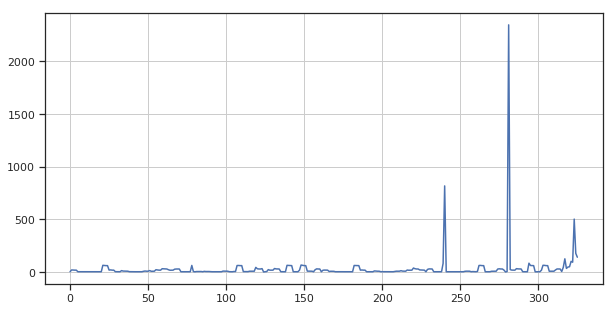

In [110]:
plt.figure(figsize=(10,5))
plt.plot(abs(np.sum(before-after,axis=0)))
plt.grid()

In [111]:
numerical_data.describe()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,AGE
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,...,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5.874000e+03,5874.000000
mean,1480.370640,3519.301690,1449.262421,2.264205,0.594747,1926.475647,629.486887,2.644022,0.784032,3508.037296,...,206393.177251,207389.489719,413782.669871,225204.672004,226216.742025,451421.403103,150306.138567,579162.530963,9.825203e+05,73.209278
std,245.181447,555.498002,202.730690,0.174939,0.067902,339.782789,94.310854,0.323084,0.122149,598.252336,...,22311.026257,22446.556238,44410.443967,29803.346129,30026.830439,59610.216041,42945.771761,55653.458585,1.057088e+05,7.309914
min,506.000000,1849.000000,978.000000,1.480000,0.362000,699.000000,218.000000,1.489000,0.417000,1316.000000,...,109831.777000,89603.654730,199435.431700,106254.861600,25546.000000,195210.941700,23596.000000,276362.431700,4.467504e+05,55.000000
25%,1316.250000,3134.000000,1305.000000,2.153000,0.550000,1706.250000,565.000000,2.443250,0.696000,3097.250000,...,191600.000000,192830.500000,384374.000000,204704.000000,205749.941500,410552.000000,149531.500000,542393.750000,9.077692e+05,68.000000
50%,1452.000000,3495.000000,1436.000000,2.268000,0.591000,1922.000000,625.000000,2.668500,0.784000,3449.000000,...,206413.000000,207388.244859,413741.500000,224132.500000,225277.313450,449906.500000,162896.500000,579438.000000,9.802945e+05,73.000000
75%,1613.000000,3861.750000,1572.000000,2.379000,0.637000,2142.000000,684.000000,2.865000,0.869000,3866.000000,...,221116.500000,222379.250000,443049.601225,243386.250000,244818.000000,487801.250000,175295.500000,615143.750000,1.052486e+06,78.000000
max,2866.000000,7965.000000,4143.000000,3.213000,0.926000,3892.000000,1266.000000,3.644000,1.219000,5785.000000,...,289315.996000,290674.859200,579990.855200,350784.000000,350209.000000,700367.000000,223265.000000,773898.000000,1.394760e+06,96.000000


## So, this is our data from numerical ST float features + Patient Age

In [112]:
numerical_data

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,AGE
0,1796.0,3946.0,1578.0,2.358,0.648,2807.0,744.0,3.057,0.792,3730.0,...,227898.0000,231372.0000,459270.0000,221181.0000,224841.0000,446022.0000,174012.0,633282.0000,9.989370e+05,63.0
1,1751.0,3927.0,1579.0,2.331,0.660,2820.0,772.0,3.055,0.809,3564.0,...,223158.0000,224229.0000,447387.0000,229883.0000,227633.0000,457516.0000,173016.0,620403.0000,9.954770e+05,63.0
2,1373.0,3200.0,1375.0,2.158,0.683,1968.0,687.0,2.350,0.786,3108.0,...,222306.0000,223673.0000,445979.0000,214800.0000,215904.0000,430704.0000,171871.0,617850.0000,1.073660e+06,90.0
3,1200.0,3226.0,1368.0,2.179,0.583,1914.0,708.0,2.275,0.730,2998.0,...,222171.0000,220781.0000,442952.0000,215978.0000,217603.0000,433581.0000,167879.0,610831.0000,1.010870e+06,90.0
4,1435.0,2740.0,1153.0,2.298,0.609,1759.0,539.0,2.617,0.951,3870.0,...,201718.0000,197309.0000,399027.0000,197731.0000,192553.0000,390284.0000,153531.0,552558.0000,9.090550e+05,76.0
5,1451.0,2592.0,1131.0,2.243,0.554,1792.0,537.0,2.669,0.985,3173.0,...,199763.0000,193112.0000,392875.0000,199152.0000,198304.0000,397456.0000,154344.0,547219.0000,9.103070e+05,76.0
6,1653.0,3931.0,1745.0,2.172,0.580,2380.0,743.0,2.705,0.849,3817.0,...,204352.0000,208389.0000,412741.0000,251972.0000,252585.0000,504557.0000,187479.0,600220.0000,1.043550e+06,76.0
7,1689.0,3848.0,1769.0,2.141,0.573,2324.0,727.0,2.711,0.836,3743.0,...,207035.0000,207406.0000,414442.0000,250586.0000,253099.0000,503686.0000,187459.0,601901.0000,1.045820e+06,76.0
8,902.0,3119.0,1187.0,2.337,0.683,1742.0,540.0,2.565,1.053,4998.0,...,209109.0000,205427.0000,414536.0000,170939.0000,162795.0000,333734.0000,134626.0,549162.0000,9.040120e+05,85.0
9,956.0,3407.0,1190.0,2.409,0.728,1620.0,495.0,2.626,0.994,4883.0,...,206662.0000,205119.0000,411782.0000,165101.0000,158404.0000,323505.0000,136530.0,548312.0000,9.146570e+05,85.0


### Let's save obtained data for another processing steps

### Saving ST features + Patient Age + target Y as separate table for further work

In [114]:
data = numerical_data
target = df[['Y']]

pd.concat([target,data],axis=1).to_csv('st_features_and_age_without_nans_and_y_with_nans.csv')

## ST feature data should be normalized

In [115]:
data.describe()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,AGE
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,...,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5.874000e+03,5874.000000
mean,1480.370640,3519.301690,1449.262421,2.264205,0.594747,1926.475647,629.486887,2.644022,0.784032,3508.037296,...,206393.177251,207389.489719,413782.669871,225204.672004,226216.742025,451421.403103,150306.138567,579162.530963,9.825203e+05,73.209278
std,245.181447,555.498002,202.730690,0.174939,0.067902,339.782789,94.310854,0.323084,0.122149,598.252336,...,22311.026257,22446.556238,44410.443967,29803.346129,30026.830439,59610.216041,42945.771761,55653.458585,1.057088e+05,7.309914
min,506.000000,1849.000000,978.000000,1.480000,0.362000,699.000000,218.000000,1.489000,0.417000,1316.000000,...,109831.777000,89603.654730,199435.431700,106254.861600,25546.000000,195210.941700,23596.000000,276362.431700,4.467504e+05,55.000000
25%,1316.250000,3134.000000,1305.000000,2.153000,0.550000,1706.250000,565.000000,2.443250,0.696000,3097.250000,...,191600.000000,192830.500000,384374.000000,204704.000000,205749.941500,410552.000000,149531.500000,542393.750000,9.077692e+05,68.000000
50%,1452.000000,3495.000000,1436.000000,2.268000,0.591000,1922.000000,625.000000,2.668500,0.784000,3449.000000,...,206413.000000,207388.244859,413741.500000,224132.500000,225277.313450,449906.500000,162896.500000,579438.000000,9.802945e+05,73.000000
75%,1613.000000,3861.750000,1572.000000,2.379000,0.637000,2142.000000,684.000000,2.865000,0.869000,3866.000000,...,221116.500000,222379.250000,443049.601225,243386.250000,244818.000000,487801.250000,175295.500000,615143.750000,1.052486e+06,78.000000
max,2866.000000,7965.000000,4143.000000,3.213000,0.926000,3892.000000,1266.000000,3.644000,1.219000,5785.000000,...,289315.996000,290674.859200,579990.855200,350784.000000,350209.000000,700367.000000,223265.000000,773898.000000,1.394760e+06,96.000000


In [116]:
def normalize(arr):
    out = (arr - arr.mean(axis=0)[None,:])/arr.var(axis=0)
    return out

In [117]:
data = normalize(data)

In [118]:
data.describe()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,AGE
count,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,...,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03
mean,3.628921e-18,9.697205e-18,2.765162e-17,-1.377345e-13,-6.084975e-14,1.493150e-18,8.467482e-18,-1.026501e-13,1.954779e-14,9.166806e-19,...,-2.894159e-19,4.333855e-19,1.993426e-19,3.154043e-19,1.801466e-20,9.834234e-20,2.953223e-21,2.448961e-19,-4.459367e-20,8.564254e-16
std,4.078612e-03,1.800186e-03,4.932652e-03,5.716280e+00,1.472718e+01,2.943057e-03,1.060323e-02,3.095169e+00,8.186723e+00,1.671535e-03,...,4.482089e-05,4.455026e-05,2.251723e-05,3.355328e-05,3.330355e-05,1.677565e-05,2.328518e-05,1.796834e-05,9.459947e-06,1.368005e-01
min,-1.620873e-02,-5.412899e-03,-1.146631e-02,-2.562456e+01,-5.048053e+01,-1.063188e-02,-4.626288e-02,-1.106519e+01,-2.459940e+01,-6.124620e-03,...,-1.939834e-04,-2.337726e-04,-1.086795e-04,-1.339164e-04,-2.225692e-04,-7.210335e-05,-6.870218e-05,-9.776236e-05,-4.794637e-05,-3.407753e-01
25%,-2.730159e-03,-1.248636e-03,-3.510057e-03,-3.633710e+00,-9.705268e+00,-1.907503e-03,-7.250168e-03,-1.923407e+00,-5.900143e+00,-1.147752e-03,...,-2.971819e-05,-2.889561e-05,-1.491094e-05,-2.308012e-05,-2.270027e-05,-1.150156e-05,-4.200087e-07,-1.187121e-05,-6.689513e-06,-9.748840e-02
50%,-4.719478e-04,-7.875379e-05,-3.226887e-04,1.240143e-01,-8.127902e-01,-3.876619e-05,-5.044542e-04,2.345046e-01,-2.168641e-03,-1.649520e-04,...,3.982216e-08,-2.470705e-09,-2.087417e-08,-1.207075e-06,-1.041945e-06,-4.263276e-07,6.826489e-06,8.893823e-08,-1.991848e-07,-3.916508e-03
75%,2.206299e-03,1.109762e-03,2.986335e-03,3.751035e+00,9.164136e+00,1.866782e-03,6.128831e-03,2.116989e+00,5.694738e+00,1.000159e-03,...,2.957786e-05,2.975057e-05,1.483908e-05,2.046923e-05,2.063115e-05,1.023810e-05,1.354922e-05,1.161693e-05,6.261240e-06,8.965539e-02
max,2.305005e-02,1.440705e-02,6.554149e-02,3.100270e+01,7.184526e+01,1.702455e-02,7.156225e-02,9.579864e+00,2.915259e+01,6.361904e-03,...,1.665846e-04,1.652986e-04,8.427178e-05,1.413800e-04,1.375231e-04,7.005886e-05,3.955826e-05,6.287250e-05,3.689158e-05,4.265142e-01


### Use automatic distribution fitting library Fitter to estimate the best type of distribution and it's parameters

In [120]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from multiprocessing import Pool


def fit(col):
    f = Fitter(data[col])
    f.fit()
    return col, f

pdfs = []

# fitting takes a lot of time
# I used multiprocessing package to do this task in 8 threads
with Pool(8) as p:
    res = [p.apply_async(fit, (col,)) for col in data.columns]
    
    for r in tqdm(res):
        pdfs.append(r.get())


100%|██████████| 1/1 [01:00<00:00, 60.92s/it]


### Saving estimated distributions in binary format to be used in other scripts

In [ ]:
import pickle

pickle.dump(pdfs,open("all_pdfs.pickle","wb"))

In [140]:
!ls

1907.07783.pdf
ADNI_PCA_intrinsic_dim_NN_classif.ipynb
all_pdfs.pickle
blender-2.79-linux-glibc219-x86_64
blender-2.79-linux-glibc219-x86_64.tar.bz2
brain-coloring
brain-coloring_disco
correlations
covariance.png
data
data.csv
distributions
distributions.zip
giphy.webp
Histograms
Image_1_cortical-outer.png
information.png
inner_small.gif
Integer_to_latent.ipynb
pdfs.pickle
Project.ipynb
pt_features_with_nans.csv
st_features_and_age_without_nans_and_y_with_nans.csv
st_features_only_without_nans.csv
st_features_without_nans_and_y_with_nans.csv
target.csv


### Visualizing fitted distributions and saving them as figures

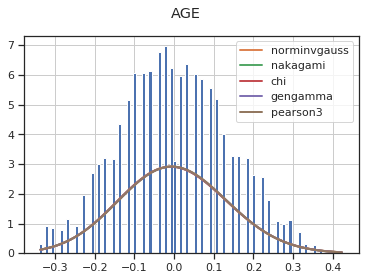

In [137]:
import pickle
from fitter import Fitter

pdfs = pickle.load(open("all_pdfs.pickle","rb"))

# plotting fitter summary
for pdf in pdfs:
    pdf[1].summary()
    plt.suptitle(pdf[0])
    plt.savefig('distributions/{}'.format(pdf[0]))
    plt.show()

## We can try to plot some scatter plots and check what is going on with ST features

In [151]:
from tqdm import tqdm

from multiprocessing import Pool

tmp = pd.concat([data,target],axis=1)
cols = tmp.columns
N = len(cols)

cov = np.zeros((N,N))

N = 20

def get_scat(i,j,d):
    plt.figure(figsize=(10,10))
    sns.scatterplot(data=d, x=i, y=j, hue="Y", palette=['green','yellow','red'])
    plt.title(i + " v.s. " + j)
    plt.grid()
    plt.savefig('correlations/ scatter_plot_{}_{}.png'.format(i,j))
    plt.close('all')

    
tasks = []
for i in tqdm(range(N)):
    for j in range(i+1, N):
        tasks.append((cols[i],cols[j],tmp))

        
get_scat(*tasks[0])        
with Pool(8) as p:
    res = [p.apply_async(get_scat,t) for t in tasks]

    for r in tqdm(res):
        r.get()
    
# for i in tqdm(range(N)):
#     for j in range(i+1, N):
#         plt.figure(figsize=(10,10))
# #         cov[i][j] = np.var(tmp[[cols[i]]].values,tmp[[cols[j]]].values)
#         sns.scatterplot(data=tmp, x=cols[i], y=cols[j], hue="Y", palette=['green','yellow','red'])
#         plt.title(cols[i] + " v.s. " + cols[j])
# #         plt.axis('equal')
#         plt.grid()
#         plt.savefig('correlations/ scatter_plot_{}_{}.png'.format(cols[i],cols[j]))
#         plt.close('all')

100%|██████████| 190/190 [00:29<00:00,  6.52it/s]


### Covariance matrix

In [152]:
cov = tmp.corr()

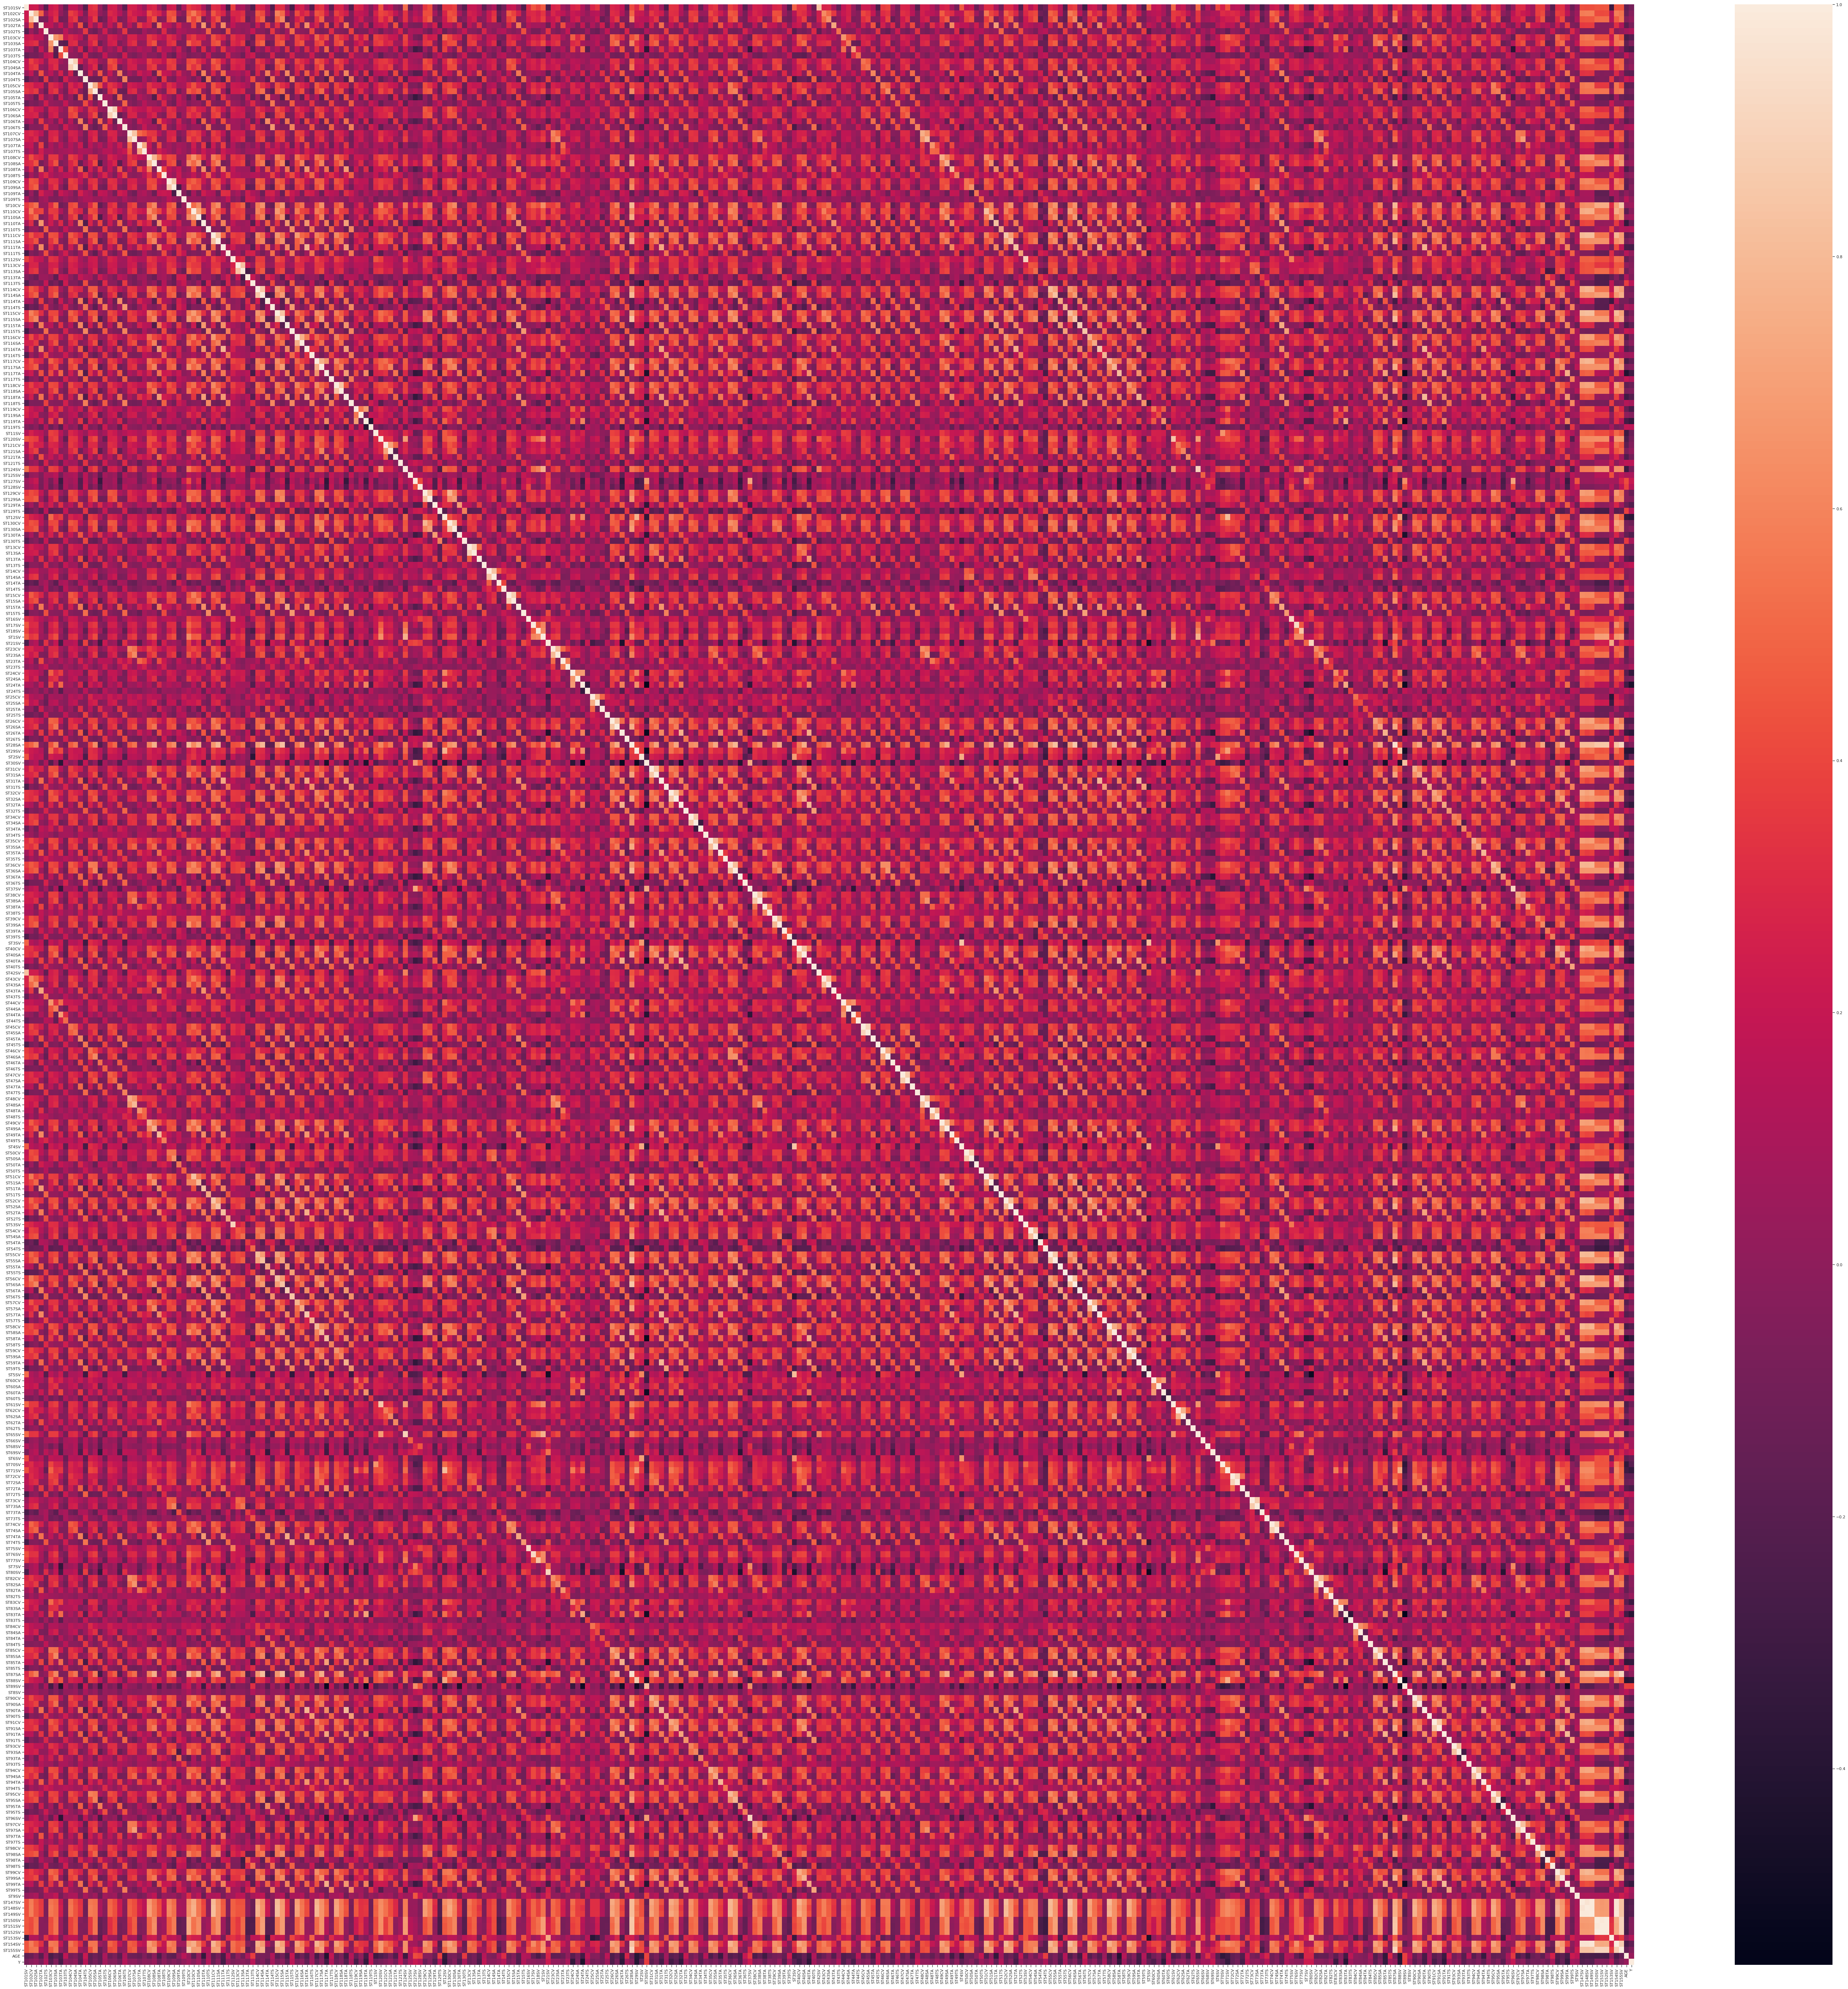

In [153]:
plt.figure(figsize=(100,100))
sns.heatmap(cov)
plt.savefig('covariance.png')

### Information Matrix

In [154]:
information = pd.DataFrame(np.linalg.inv(cov),index = tmp.columns)

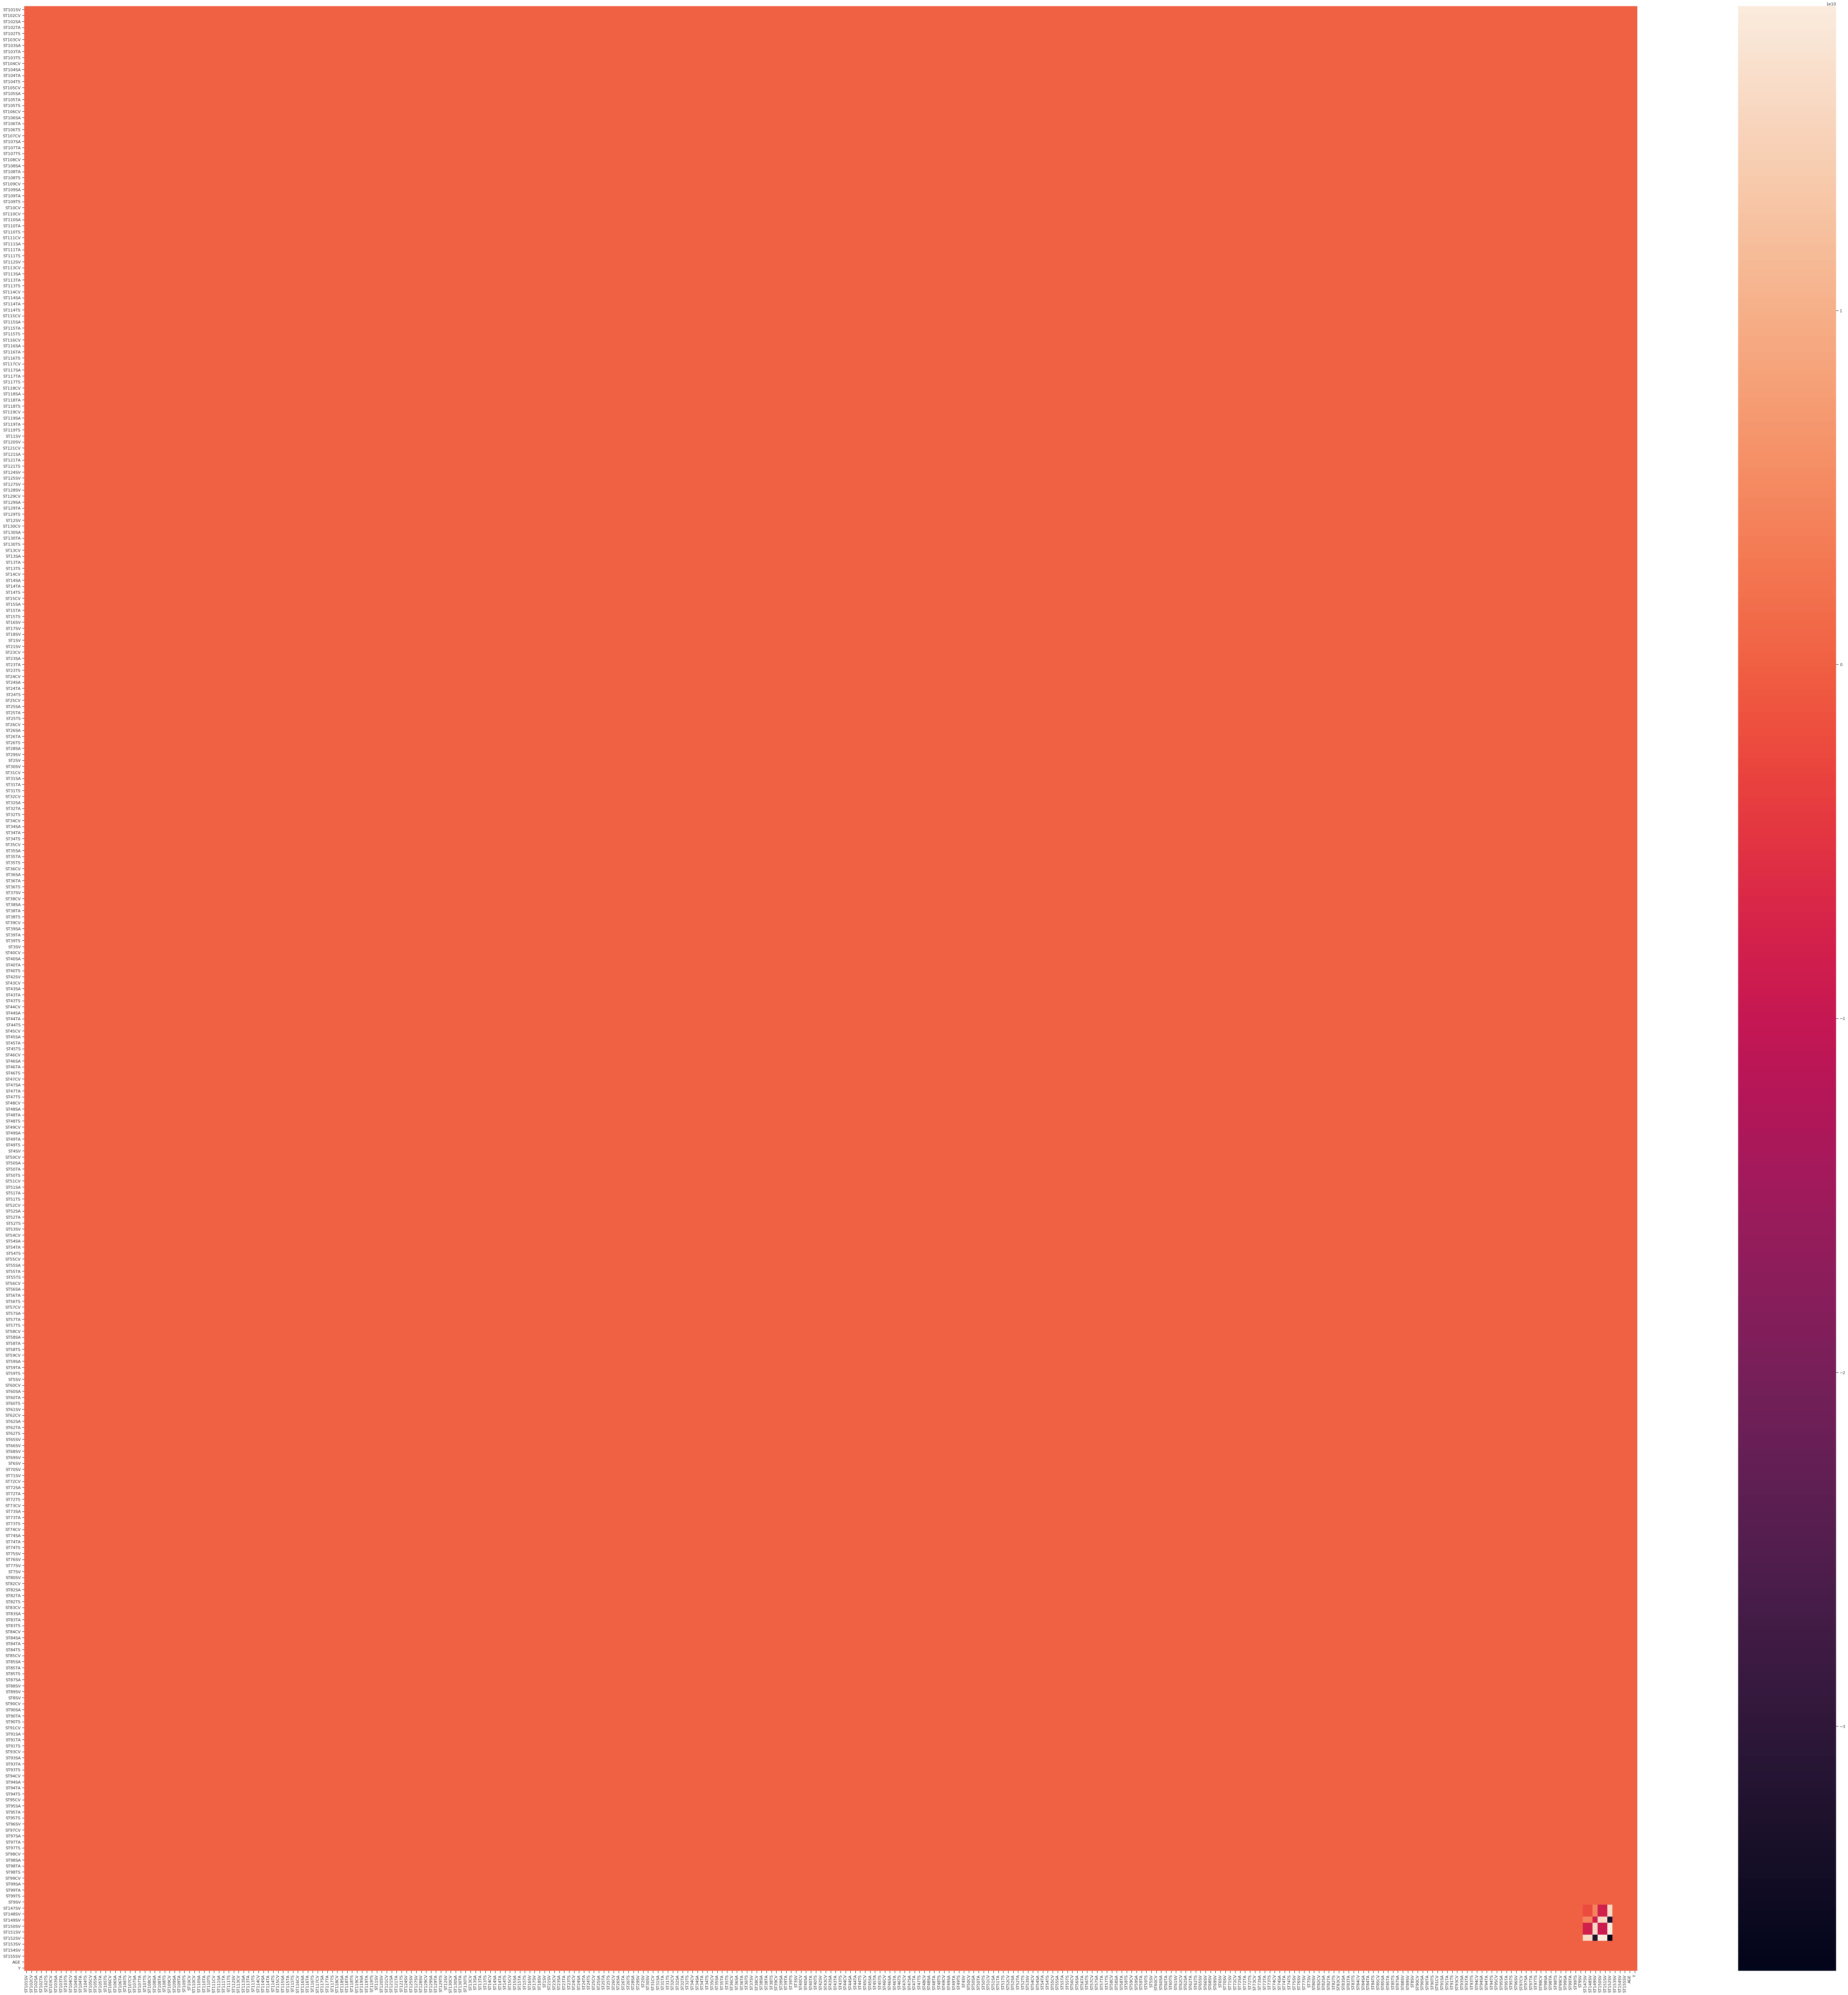

In [155]:
plt.figure(figsize=(100,100))
sns.heatmap(information,xticklabels=tmp.columns, yticklabels=tmp.columns)
plt.savefig('information.png')

# SVD decomposition

In [171]:
U, sigma, V = np.linalg.svd(data)

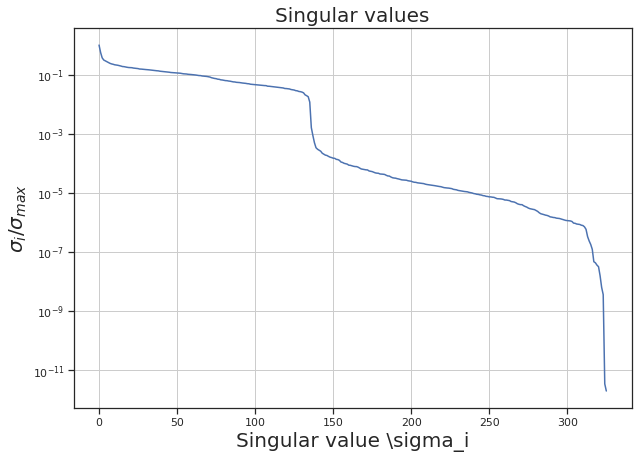

In [172]:
plt.figure(figsize=(10,7))
plt.title('Singular values',fontsize=20)
plt.semilogy(sigma/sigma[0])
plt.xlabel('Singular value \sigma_i',fontsize=20)
plt.ylabel('$\sigma_i/\sigma_{max}$',fontsize=20)
plt.grid()

**It is clear that there re several singular values drops and thus the number of components can be selected ar different threshold. There are small drop at approx 75 components and values of magnitude of $10^{-1}$; the second drop is at approx 135 components and values of magnitude of $10^{-3}$**

# sklearn.decomposition PCA ()

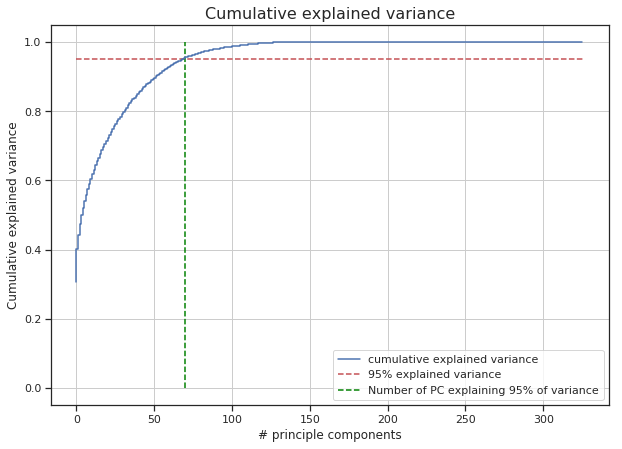

In [173]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)

plt.figure(figsize=(10,7))
plt.step(range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.hlines(y=0.95, xmin=0, xmax=len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')
plt.vlines(x=70, ymin=0,ymax=1,colors='green',linestyles='dashed',label='Number of PC explaining 95% of variance')
plt.grid()

plt.legend(loc='lower right')
plt.show()

**Approximately there are 70 principal components which explain 95% of variance in data. That somehow correspond to SVD decomposition analysis.**

## Intrinsic dimension

In [174]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in tqdm(range(k1, k2 + 1)): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

100%|██████████| 151/151 [20:30<00:00,  8.15s/it]


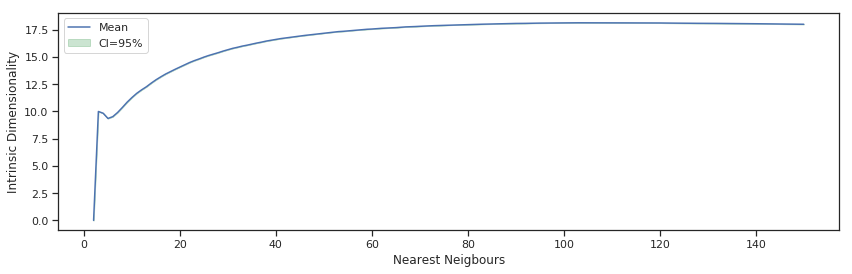

In [177]:
import warnings
warnings.filterwarnings("ignore")

k1 = 0 # start of interval(included)
k2 = 150 # end of interval(included)
nb_iter = 1 # more iterations more accuracy
# intrinsic_dim_scale_interval gives better estimation
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data.values, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 4))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

In [176]:
np.sum(intdim_k_repeated.mean(axis=0))/(k2-k1+1)

17.416778580374476

**Estimated intrinsic dimensionality using KNN approach indicates about intrinsic dimensionality of 17** 